In [804]:
import importlib

import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import rfft, rfftfreq
from scipy.optimize import curve_fit, minimize_scalar, minimize
import qutip as qt

import h5py

import src_qubit_swaps



importlib.reload(src_qubit_swaps);
from src_qubit_swaps import QubitSwapTraceMeasurement, generate_swap_filename, generate_singleshot_filename   

# 1. Source Code

In [969]:
def plot_traces(measurement_list, simulation_parameters, calibrate_readout=False, colors=None, markers=None, show_traces=None, 
                xlim=None, show_simulations=False, only_simulations=False, title=None, fontsize=20, labels=None, legend=True):
    
    plt.figure(figsize=(10, 6))
    
    plt.rcParams['font.size'] = fontsize
    

    if colors is None:
        colors = ['red', 'blue', 'orange']
        colors = ['purple', 'gold', 'teal']
        colors = ['#5d32ed', '#f57600', '#00bf7c']
    
    if markers is None:
        markers = ['o', 'x', '+']
        markers = ['o', 'o', 'o']

    if show_traces is None:
        show_traces = range(len(measurement_list))
        
    if labels is None:
        labels = ['Q1', 'Probe', 'Q2']

    if xlim is None:
        xlim = (0, 500)

    ### plus initial state
    
    permutation = [0, 2, 1]
    for j in range(len(measurement_list)):
        
        i = permutation[j]
        
        if i in show_traces:
            alpha = 1
        else:
            alpha = 0

        trace = measurement_list[i]

        trace.simulated_populations = None
        
        
        
        if calibrate_readout:
            populations = trace.get_calibrated_populations()
        else:
            populations = trace.get_populations()
        times = trace.get_times()

        
        if only_simulations:
            show_simulations = True
        
        if show_simulations:
            simulated_populations = trace.get_simulated_populations(**simulation_parameters)  
            if only_simulations:
                plt.plot(times, simulated_populations, color=colors[i], alpha=alpha, label=labels[i])
            else:
                plt.plot(times, simulated_populations, color=colors[i], alpha=alpha)
            
        if not only_simulations:
            plt.plot(times, populations, linestyle='', color=colors[i], marker=markers[i], ms=4, alpha=alpha, label=labels[i])


    plt.xlabel('Time (ns)')
    plt.ylabel('Populations')

    if trace.initial_state == 'plus':
        initial_state_symbol = '+'
    elif trace.initial_state == 'minus':
        initial_state_symbol = '-'

    if title is None:
        title = r'$|{}\rangle$ swaps with {} coupling'.format(initial_state_symbol, trace.coupling_sign)
    plt.title(title)

    
    plt.xlim(*xlim)
    plt.ylim(-0.1, 1.1)

    if legend:
        plt.legend(loc='upper right', fontsize=fontsize*0.75)
    plt.show()



# 2. Positive Coupling

In [897]:
# I don't have the long data so this is the short time data

plus_positive_measurements_long = []
plus_positive_measurements_long.append(QubitSwapTraceMeasurement('Q1', 'plus', 'positive', generate_swap_filename('2025', '03', '03', '18', '00', '52', adiabatic=True), generate_singleshot_filename('2025', '03', '03', '18', '00', '11')))
plus_positive_measurements_long.append(QubitSwapTraceMeasurement('Q2', 'plus', 'positive', generate_swap_filename('2025', '03', '03', '18', '21', '31', adiabatic=True), generate_singleshot_filename('2025', '03', '03', '18', '21', '13')))
plus_positive_measurements_long.append(QubitSwapTraceMeasurement('Q3', 'plus', 'positive', generate_swap_filename('2025', '03', '03', '18', '40', '13', adiabatic=True), generate_singleshot_filename('2025', '03', '03', '18', '39', '32')))

minus_positive_measurements_long = []
minus_positive_measurements_long.append(QubitSwapTraceMeasurement('Q1', 'minus', 'positive', generate_swap_filename('2025', '03', '03', '18', '54', '58', adiabatic=True), generate_singleshot_filename('2025', '03', '03', '18', '54', '34')))
minus_positive_measurements_long.append(QubitSwapTraceMeasurement('Q2', 'minus', 'positive', generate_swap_filename('2025', '03', '03', '19', '10', '21', adiabatic=True), generate_singleshot_filename('2025', '03', '03', '19', '09', '46')))
minus_positive_measurements_long.append(QubitSwapTraceMeasurement('Q3', 'minus', 'positive', generate_swap_filename('2025', '03', '03', '19', '24', '36', adiabatic=True), generate_singleshot_filename('2025', '03', '03', '19', '24', '08')))


minus_positive_measurements_long = []
minus_positive_measurements_long.append(QubitSwapTraceMeasurement('Q1', 'minus', 'positive', generate_swap_filename('2025', '03', '04', '11', '31', '29', adiabatic=True), generate_singleshot_filename('2025', '03', '04', '11', '30', '36')))
minus_positive_measurements_long.append(QubitSwapTraceMeasurement('Q2', 'minus', 'positive', generate_swap_filename('2025', '03', '04', '14', '17', '44', adiabatic=True), generate_singleshot_filename('2025', '03', '04', '14', '16', '42')))
minus_positive_measurements_long.append(QubitSwapTraceMeasurement('Q3', 'minus', 'positive', generate_swap_filename('2025', '03', '04', '14', '29', '14', adiabatic=True), generate_singleshot_filename('2025', '03', '04', '14', '28', '46')))


### 2.1 Plus State

#### 2.1.1 Not Calibrated

In [904]:
### simulation params

plus_positive_parameters = {}

plus_positive_parameters['num_levels'] = 3
plus_positive_parameters['U'] = 180 * 2 * np.pi # MHz


plus_positive_parameters['g_12'] = 7.49 * 2 * np.pi * 0.931
plus_positive_parameters['g_23'] = plus_positive_parameters['g_12']

plus_positive_parameters['g_13'] = 9.48 * 2 * np.pi # 2pi MHz

plus_positive_parameters['gamma_1'] = 0.05 # MHz
plus_positive_parameters['gamma_phi'] = 0.14038149 # MHz

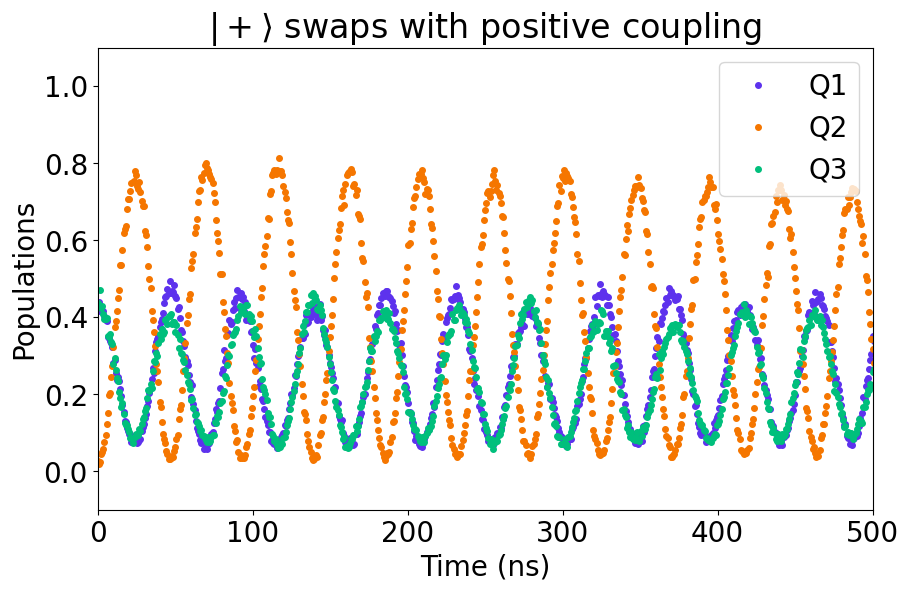

In [920]:
plot_traces(plus_positive_measurements_long, plus_positive_parameters, calibrate_readout=False, colors=['#5d32ed', '#f57600', '#00bf7c'])

# plot_traces(plus_positive_measurements_long, plus_positive_parameters, calibrate_readout=False, colors=['#3619b9', '#f57600', '#00bf7c'])

#### 2.1.2 Calibrated

In [906]:
### simulation params

plus_positive_calibrated_parameters = {}

num_levels = 3
plus_positive_calibrated_parameters['num_levels'] = num_levels
plus_positive_calibrated_parameters['U'] = 180 * 2 * np.pi # MHz

plus_positive_calibrated_parameters['omega_1'] = 0 * 2 * np.pi # MHz
plus_positive_calibrated_parameters['omega_2'] = 0 * 2 * np.pi # MHz
plus_positive_calibrated_parameters['omega_3'] = 0 * 2 * np.pi # MHz


global_factor = 0.9335
plus_positive_calibrated_parameters['g_12'] = 7.49 * 2 * np.pi * global_factor


plus_positive_calibrated_parameters['g_23'] = 7.41 * 2 * np.pi * global_factor
# plus_negative_calibrated_parameters['g_23'] = plus_negative_calibrated_parameters['g_12']



plus_positive_calibrated_parameters['g_13'] = 9.48 * 2 * np.pi * global_factor
# plus_negative_calibrated_parameters['g_13'] = 9.48/2 * 2 * np.pi * 1.002
# plus_negative_calibrated_parameters['g_13'] = 4.74948055 * 2 * np.pi

plus_positive_calibrated_parameters['gamma_1'] = 0.05 # MHz
plus_positive_calibrated_parameters['gamma_phi'] = 0.14038149 # MHz


plus_positive_calibrated_parameters['initial_state'] = np.sqrt(0.5)*qt.basis([num_levels]*3, [1, 0, 0]) + np.sqrt(0.5)*qt.basis([num_levels]*3, [0, 0, 1])


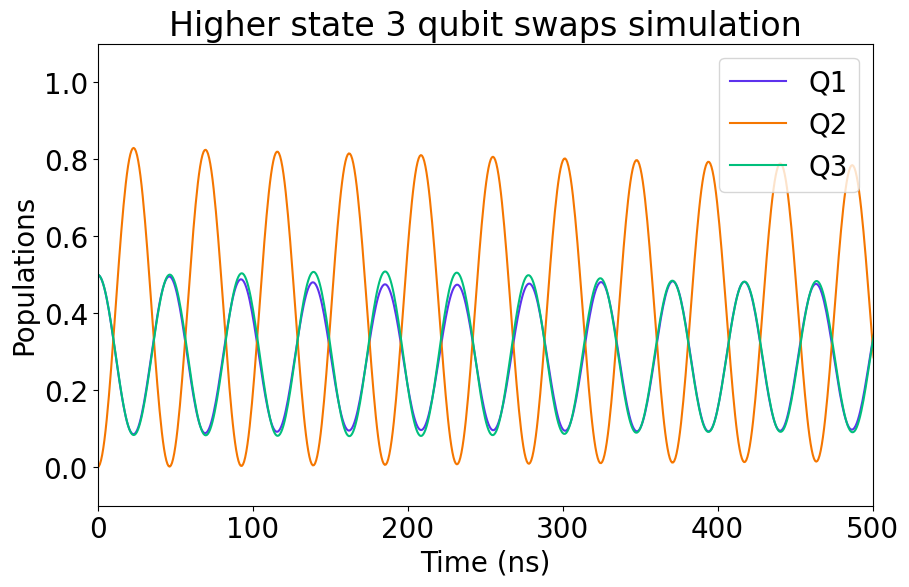

In [941]:
title = 'Higher state 3 qubit swaps simulation'

plot_traces(plus_positive_measurements_long, plus_positive_calibrated_parameters, calibrate_readout=True, show_traces=None, 
            xlim=None, only_simulations=True, title=title)

### 2.2 Minus State

#### 2.2.1 Not Calibrated

In [898]:
### simulation params

minus_positive_parameters = {}

minus_positive_parameters['num_levels'] = 3
minus_positive_parameters['U'] = 180 * 2 * np.pi # MHz


minus_positive_parameters['g_12'] = 7.49 * 2 * np.pi * 0.931
minus_positive_parameters['g_23'] = plus_positive_parameters['g_12']

minus_positive_parameters['g_13'] = 9.48 * 2 * np.pi # 2pi MHz

minus_positive_parameters['gamma_1'] = 0.05 # MHz
minus_positive_parameters['gamma_phi'] = 0.14038149 # MHz

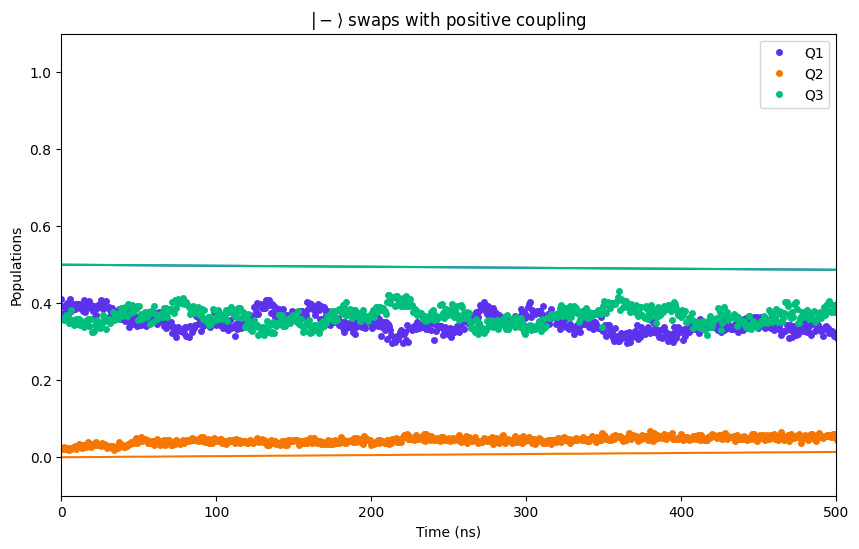

In [899]:
plot_traces(minus_positive_measurements_long, minus_positive_parameters, calibrate_readout=False, show_traces=None)

#### 2.2.2 Calibrated

In [900]:
### simulation params

minus_positive_calibrated_parameters = {}

minus_positive_calibrated_parameters['num_levels'] = 3
minus_positive_calibrated_parameters['U'] = 180 * 2 * np.pi # MHz


global_factor = 0.9335
minus_positive_calibrated_parameters['g_12'] = 7.49 * 2 * np.pi * global_factor


minus_positive_calibrated_parameters['g_23'] = 7.41 * 2 * np.pi * global_factor
# plus_negative_calibrated_parameters['g_23'] = plus_negative_calibrated_parameters['g_12']



minus_positive_calibrated_parameters['g_13'] = 9.48 * 2 * np.pi * global_factor
# plus_negative_calibrated_parameters['g_13'] = 9.48/2 * 2 * np.pi * 1.002
# plus_negative_calibrated_parameters['g_13'] = 4.74948055 * 2 * np.pi

minus_positive_calibrated_parameters['gamma_1'] = 0.05 # MHz
minus_positive_calibrated_parameters['gamma_1'] = 0.2 # MHz
minus_positive_calibrated_parameters['gamma_phi'] = 0.14038149 # MHz
minus_positive_calibrated_parameters['gamma_phi'] = 0.6 # MHz

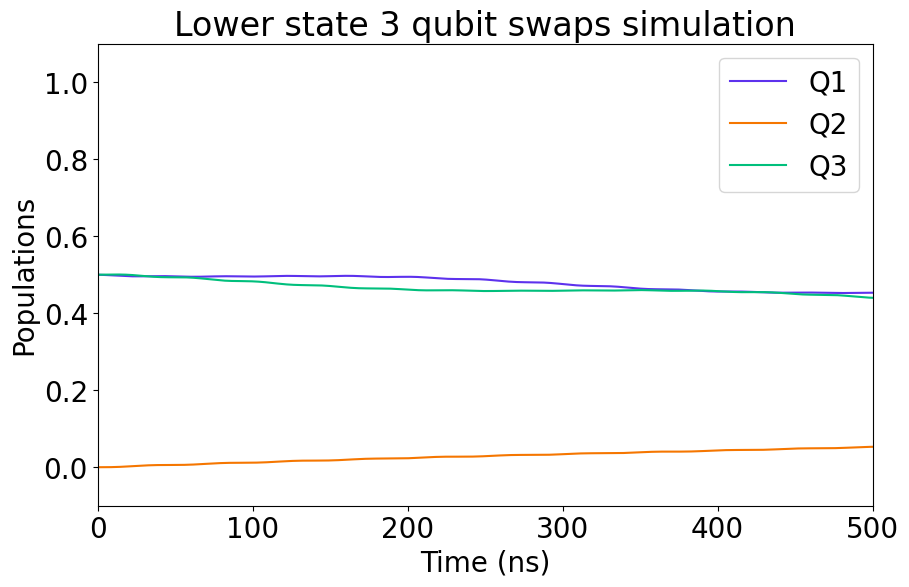

In [943]:
title = 'Lower state 3 qubit swaps simulation'

plot_traces(minus_positive_measurements_long, minus_positive_calibrated_parameters, calibrate_readout=True, show_traces=None, only_simulations=True, title=title)

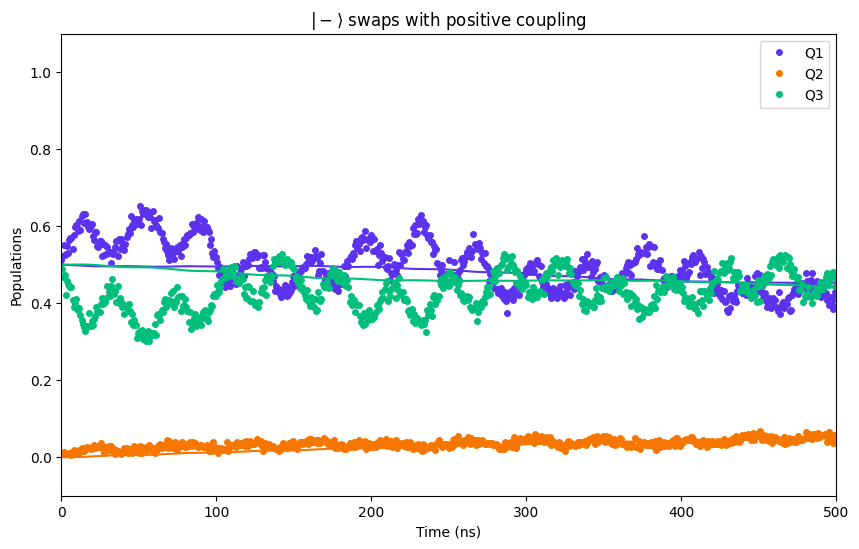

# 3. Negative Coupling

In [759]:
plus_negative_measurements_long = []
plus_negative_measurements_long.append(QubitSwapTraceMeasurement('Q1', 'plus', 'negative', generate_swap_filename('2025', '03', '03', '09', '59', '45', adiabatic=True), generate_singleshot_filename('2025', '03', '03', '09', '59', '02')))
plus_negative_measurements_long.append(QubitSwapTraceMeasurement('Q2', 'plus', 'negative', generate_swap_filename('2025', '03', '03', '10', '49', '08', adiabatic=True), generate_singleshot_filename('2025', '03', '03', '10', '48', '02')))
plus_negative_measurements_long.append(QubitSwapTraceMeasurement('Q3', 'plus', 'negative', generate_swap_filename('2025', '03', '03', '11', '47', '56', adiabatic=True), generate_singleshot_filename('2025', '03', '03', '11', '35', '48')))


# don't have all long data yet, use short data
minus_negative_measurements_long = []
minus_negative_measurements_long.append(QubitSwapTraceMeasurement('Q1', 'minus', 'negative', generate_swap_filename('2025', '03', '03', '08', '40', '07', adiabatic=True), generate_singleshot_filename('2025', '03', '03', '08', '39', '29')))
minus_negative_measurements_long.append(QubitSwapTraceMeasurement('Q2', 'minus', 'negative', generate_swap_filename('2025', '03', '03', '09', '05', '16', adiabatic=True), generate_singleshot_filename('2025', '03', '03', '09', '04', '47')))
minus_negative_measurements_long.append(QubitSwapTraceMeasurement('Q3', 'minus', 'negative', generate_swap_filename('2025', '03', '03', '09', '21', '44', adiabatic=True), generate_singleshot_filename('2025', '03', '03', '09', '21', '15')))


### 3.1 Plus State

#### 3.1.1 Not Calibrated

In [760]:
### simulation params

plus_negative_parameters = {}

plus_negative_parameters['num_levels'] = 2
plus_negative_parameters['U'] = 180 * 2 * np.pi # MHz


plus_negative_parameters['g_12'] = 7.49 * 2 * np.pi * 0.931
plus_negative_parameters['g_23'] = plus_positive_parameters['g_12']

plus_negative_parameters['g_13'] = 9.48 * 2 * np.pi # 2pi MHz

plus_negative_parameters['gamma_1'] = 0.05 # MHz
plus_negative_parameters['gamma_phi'] = 0.14038149 # MHz

0.14038149
0.14038149
0.14038149


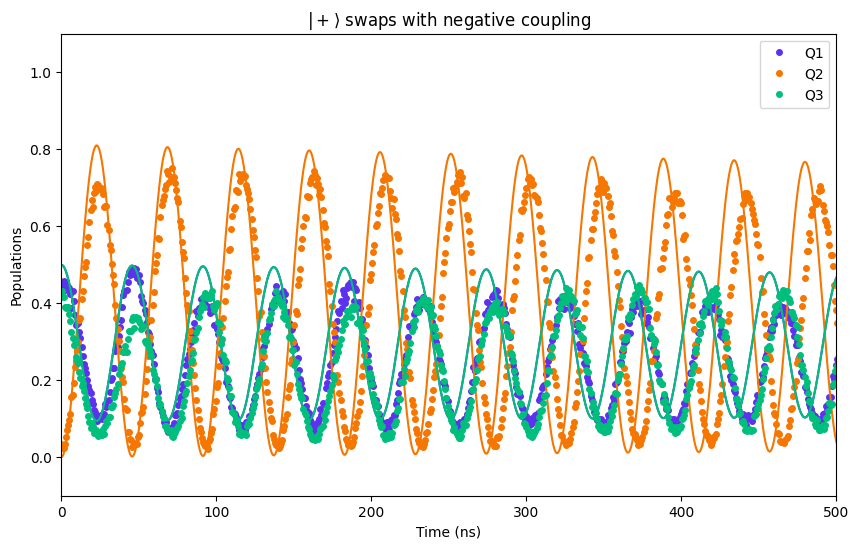

In [761]:
plot_traces(plus_negative_measurements_long, plus_negative_parameters, calibrate_readout=False, show_traces=None)

### 3.1.2 Calibrated

In [762]:
### simulation params

plus_negative_calibrated_parameters = {}

num_levels = 2
plus_negative_calibrated_parameters['num_levels'] = num_levels
plus_negative_calibrated_parameters['U'] = 180 * 2 * np.pi # MHz

plus_negative_calibrated_parameters['omega_1'] = 0 * 2 * np.pi # MHz
plus_negative_calibrated_parameters['omega_2'] = 0 * 2 * np.pi # MHz
plus_negative_calibrated_parameters['omega_3'] = 0 * 2 * np.pi # MHz


global_factor = 0.9335
plus_negative_calibrated_parameters['g_12'] = 7.49 * 2 * np.pi * global_factor


plus_negative_calibrated_parameters['g_23'] = 7.41 * 2 * np.pi * global_factor
# plus_negative_calibrated_parameters['g_23'] = plus_negative_calibrated_parameters['g_12']



plus_negative_calibrated_parameters['g_13'] = 9.24 * 2 * np.pi * global_factor
# plus_negative_calibrated_parameters['g_13'] = 9.48/2 * 2 * np.pi * 1.002
# plus_negative_calibrated_parameters['g_13'] = 4.74948055 * 2 * np.pi


print(plus_negative_calibrated_parameters['g_12'])

plus_negative_calibrated_parameters['gamma_1'] = 0.05 # MHz
plus_negative_calibrated_parameters['gamma_phi'] = 0.14038149 # MHz


plus_negative_calibrated_parameters['initial_state'] = np.sqrt(0.5)*qt.basis([num_levels]*3, [1, 0, 0]) + np.sqrt(0.5)*qt.basis([num_levels]*3, [0, 0, 1])

43.931497597048555


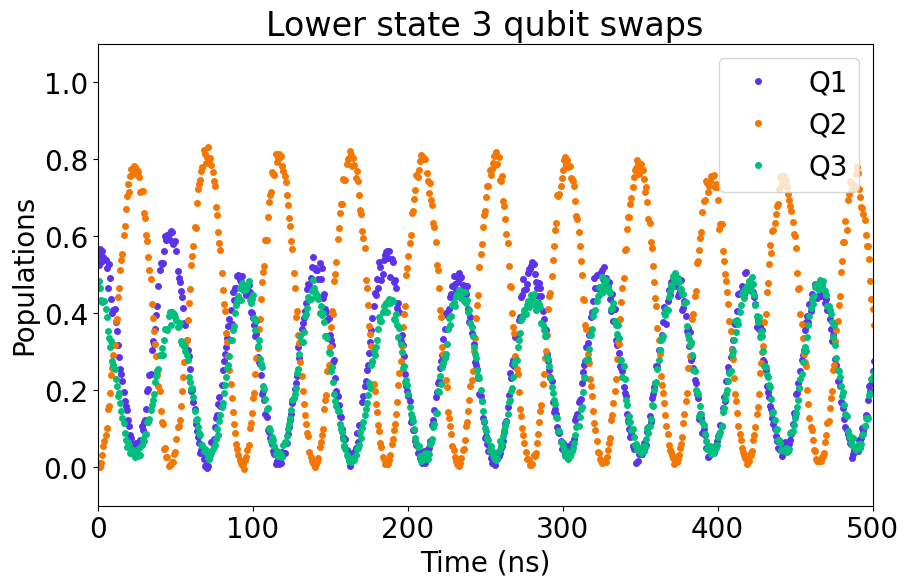

In [922]:
title = 'Lower state 3 qubit swaps'

plot_traces(plus_negative_measurements_long, plus_negative_calibrated_parameters, calibrate_readout=True, show_traces=[0, 1, 2], xlim=None, title=title)

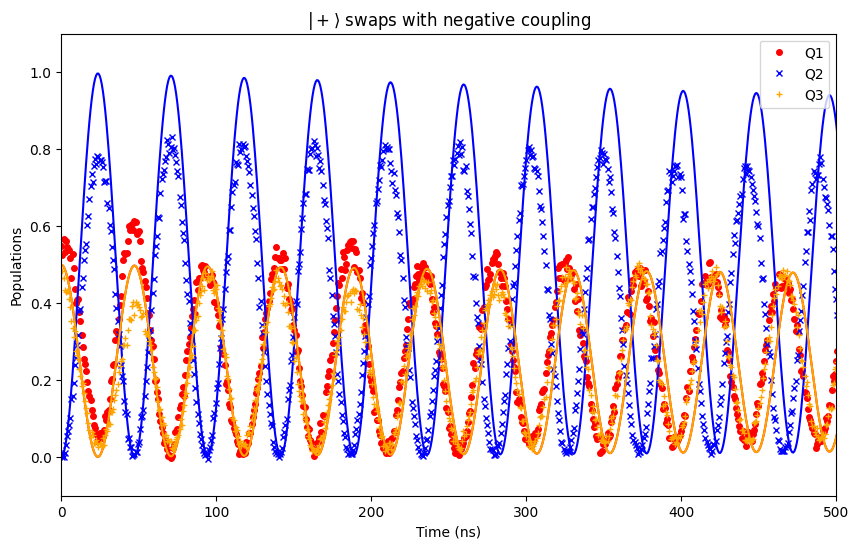

In [764]:
trace = plus_negative_measurements_long[0]
simulation_parameters = trace.get_simulation_fit_parameters(**plus_negative_calibrated_parameters)

5.721562101700059
5.514347525199742


In [765]:
print(np.array(simulation_parameters)/2/np.pi)

[6.99803176 6.91687336 8.62612138]


In [766]:
[7.35488014 7.35488016 4.74948055]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1910003537.py, line 1)

In [767]:
print(trace.cost_function(simulation_parameters, trace.get_times(), trace.get_populations(), 0, **plus_negative_calibrated_parameters))

g_12 = plus_negative_calibrated_parameters['g_12']
g_23 = plus_negative_calibrated_parameters['g_23']
g_13 = plus_negative_calibrated_parameters['g_13']
print(trace.cost_function([g_12, g_23, g_13], trace.get_times(), trace.get_populations(), 0, **plus_negative_calibrated_parameters))

5.514347525199742
5.721562101700059


In [768]:
105.9610301633771

105.9610301633771

### 3.2 Minus State

#### 3.2.1 Not Calibrated

In [769]:
### simulation params

minus_negative_parameters = {}

minus_negative_parameters['num_levels'] = 3
minus_negative_parameters['U'] = 180 * 2 * np.pi # MHz


minus_negative_parameters['g_12'] = 7.49 * 2 * np.pi * 0.931
minus_negative_parameters['g_23'] = plus_positive_parameters['g_12']

minus_negative_parameters['g_13'] = 9.48 * 2 * np.pi # 2pi MHz

minus_negative_parameters['gamma_1'] = 0.05 # MHz
minus_negative_parameters['gamma_phi'] = 0.14038149 # MHz

0.14038149
0.14038149
0.14038149


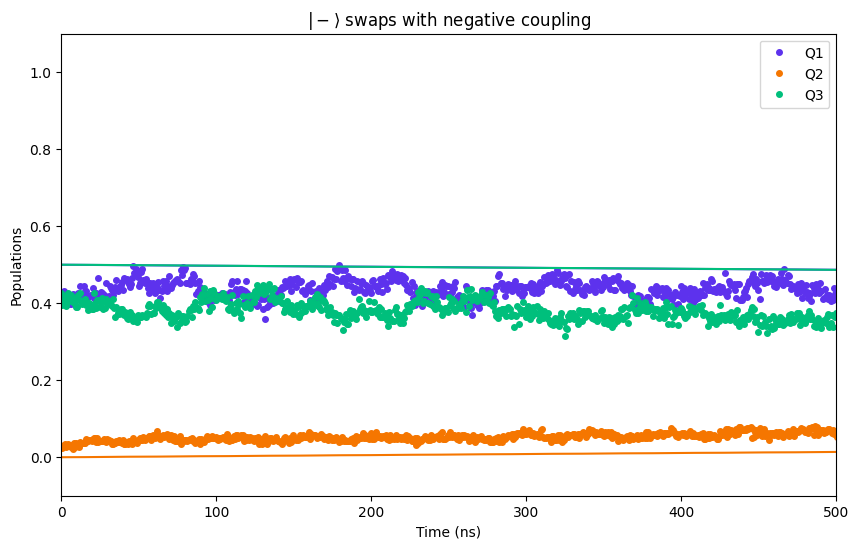

In [770]:
plot_traces(minus_negative_measurements_long, minus_negative_parameters, calibrate_readout=False, show_traces=None)

#### 3.2.2 Calibrated

In [895]:
### simulation params

minus_negative_calibrated_parameters = {}

num_levels = 2
minus_negative_calibrated_parameters['num_levels'] = num_levels
minus_negative_calibrated_parameters['U'] = 180 * 2 * np.pi # MHz

minus_negative_calibrated_parameters['omega_1'] = 0 * 2 * np.pi # MHz
minus_negative_calibrated_parameters['omega_2'] = -1000 * 2 * np.pi # MHz
minus_negative_calibrated_parameters['omega_3'] = 0 * 2 * np.pi # MHz



global_factor = 0.93
minus_negative_calibrated_parameters['g_12'] = 7.49 * 2 * np.pi * global_factor

minus_negative_calibrated_parameters['g_23'] = plus_negative_calibrated_parameters['g_12']
minus_negative_calibrated_parameters['g_23'] = 7.41 * 2 * np.pi * global_factor

minus_negative_calibrated_parameters['g_13'] = 9.48 * 2 * np.pi * global_factor


# with coupler
minus_negative_calibrated_parameters['omega_c'] = 1000 * 2 * np.pi # MHz
minus_negative_calibrated_parameters['g_13'] = 9.48 * 2 * np.pi * global_factor * 0.1

minus_negative_calibrated_parameters['g_1c'] = 100 * 2 * np.pi
minus_negative_calibrated_parameters['g_3c'] = minus_negative_calibrated_parameters['g_1c']



minus_negative_calibrated_parameters['gamma_1'] = 0.05 # MHz
minus_negative_calibrated_parameters['gamma_phi'] = 0.14038149 # MHz
minus_negative_calibrated_parameters['gamma_phi'] = 0.3 # MHz

initial_state_complex_offset = 0.05
initial_state_complex_offset = 0

minus_negative_calibrated_parameters['initial_state'] = 'minus'
minus_negative_calibrated_parameters['initial_state'] = np.sqrt(0.5)*qt.basis([num_levels]*3, [1, 0, 0]) - (np.sqrt(1-initial_state_complex_offset) + np.sqrt(initial_state_complex_offset)*1j) * np.sqrt(0.5)*qt.basis([num_levels]*3, [0, 0, 1])

initial_population = 0.495
minus_negative_calibrated_parameters['initial_state'] = np.sqrt(initial_population)*qt.basis([num_levels]*4, [1, 0, 0, 0]) - np.sqrt(initial_population)*qt.basis([num_levels]*4, [0, 0, 1, 0]) + np.sqrt(1-2*initial_population)*qt.basis([num_levels]*4, [0, 0, 0, 1])


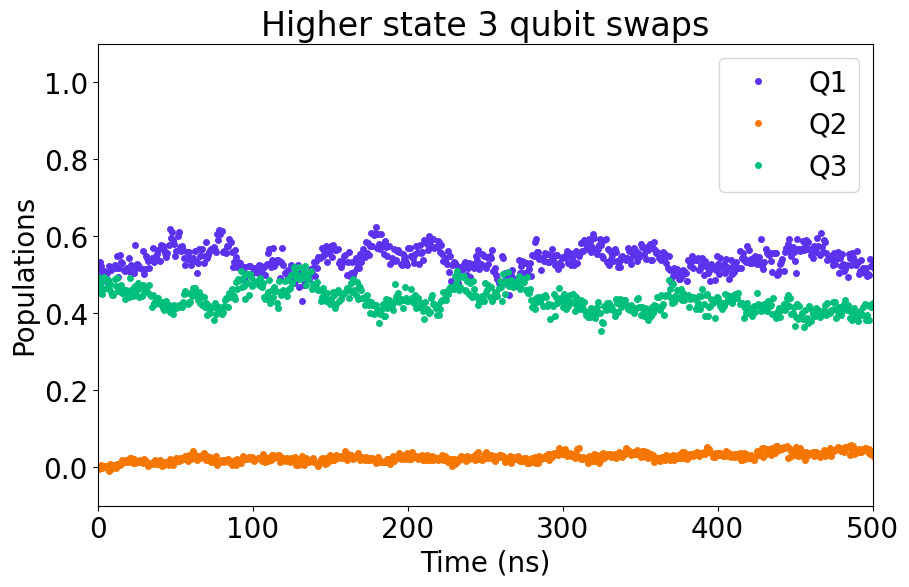

In [923]:
title = 'Higher state 3 qubit swaps'

plot_traces(minus_negative_measurements_long, minus_negative_calibrated_parameters, calibrate_readout=True, show_traces=None, title=title)

# 4. All plots here

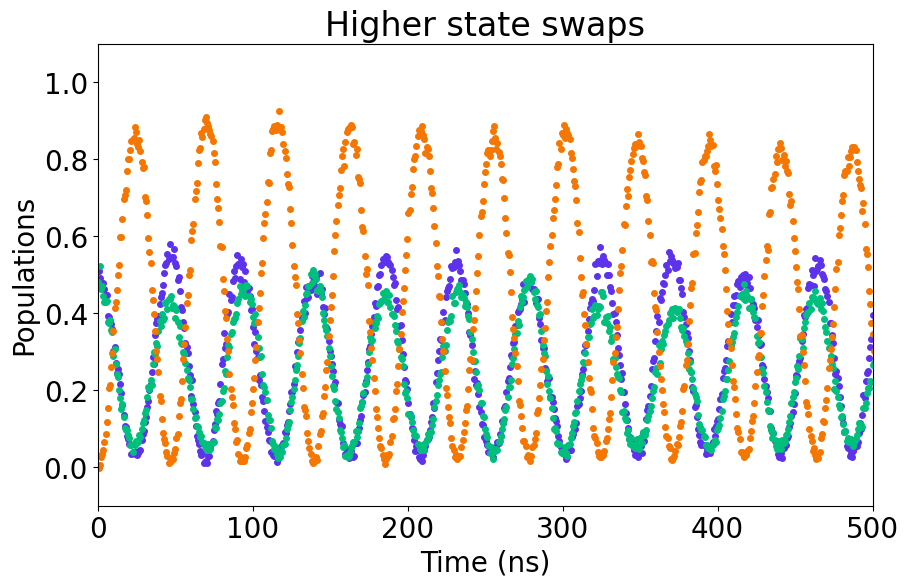

In [970]:
### plus positive data

title = 'Higher state swaps'

plot_traces(plus_positive_measurements_long, plus_positive_calibrated_parameters, calibrate_readout=True, show_traces=None, 
            xlim=None, title=title, legend=False)



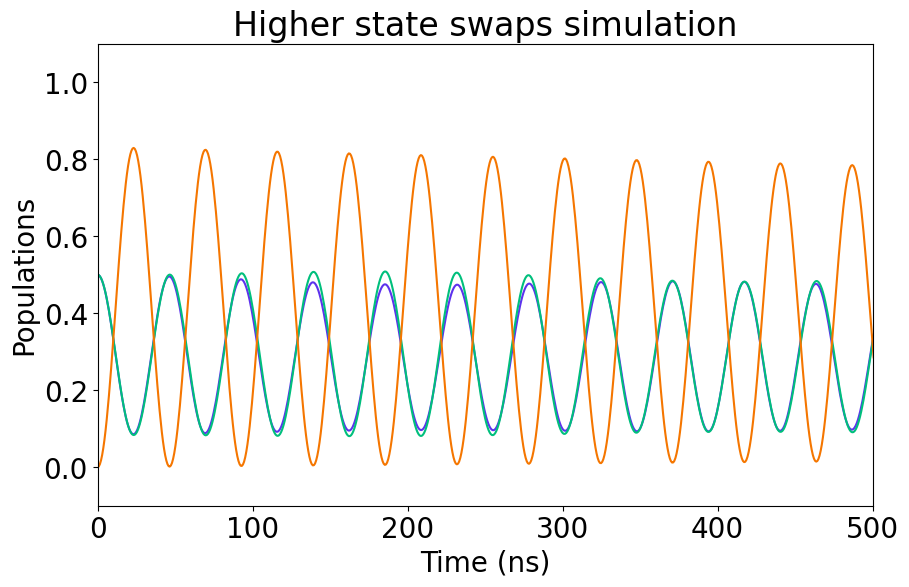

In [971]:
### plus positive simulation

title = 'Higher state swaps simulation'

plot_traces(plus_positive_measurements_long, plus_positive_calibrated_parameters, calibrate_readout=True, show_traces=None, 
            xlim=None, only_simulations=True, title=title, legend=False)

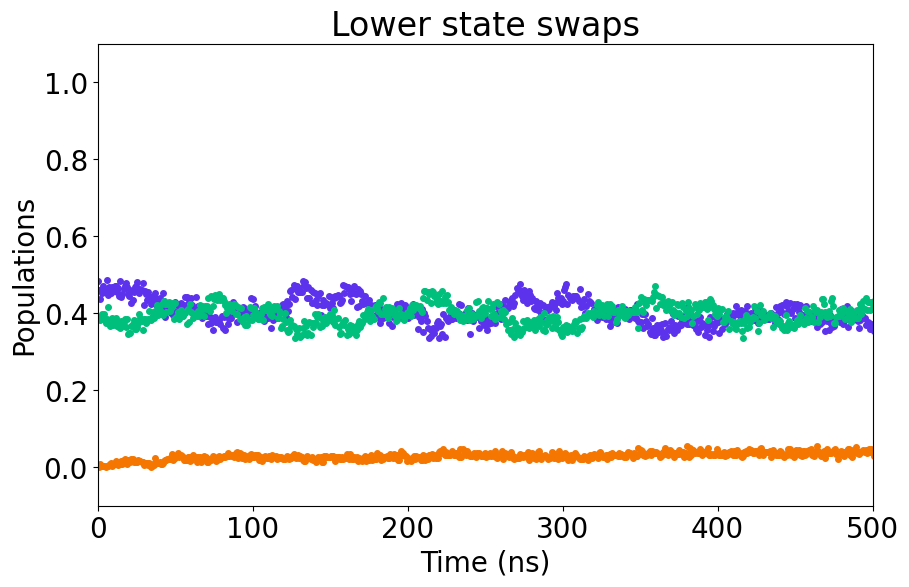

In [972]:
### minus negative data
title = 'Lower state swaps'

plot_traces(minus_positive_measurements_long, minus_positive_calibrated_parameters, calibrate_readout=True, 
            show_traces=None, title=title, legend=False)

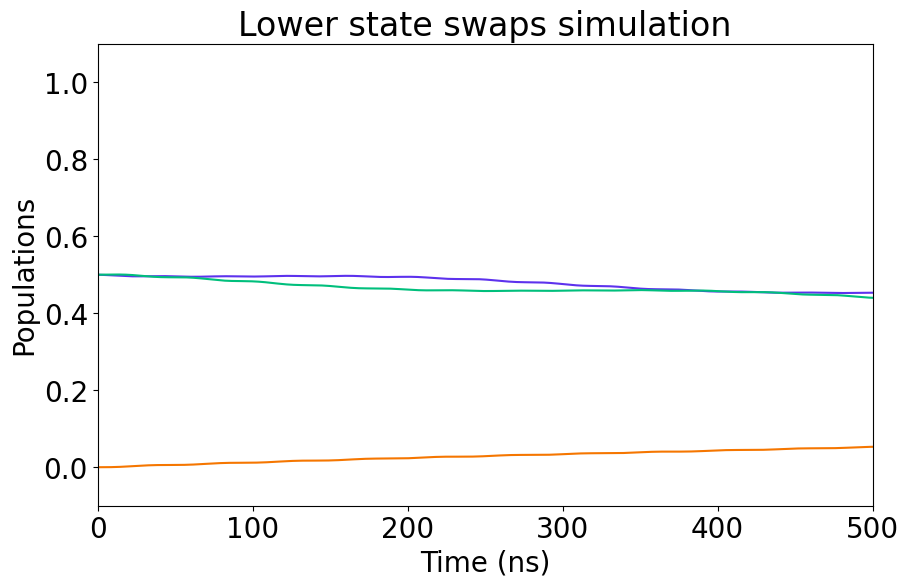

In [976]:
### minus negative simulation
title = 'Lower state swaps simulation'

plot_traces(minus_positive_measurements_long, minus_positive_calibrated_parameters, calibrate_readout=True, 
            show_traces=None, only_simulations=True, title=title, legend=False)

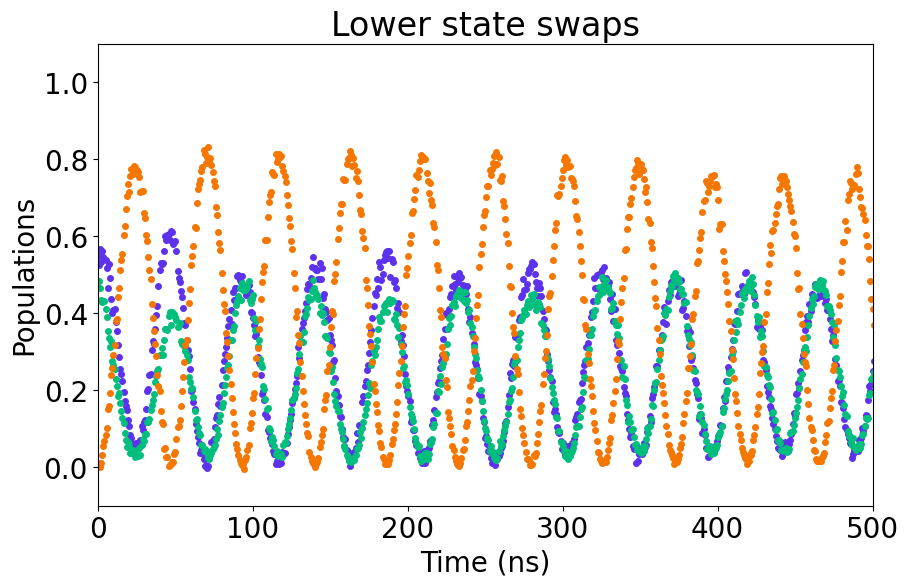

In [973]:
### plus negative

title = 'Lower state swaps'

plot_traces(plus_negative_measurements_long, plus_negative_calibrated_parameters, calibrate_readout=True, 
            title=title, legend=False)

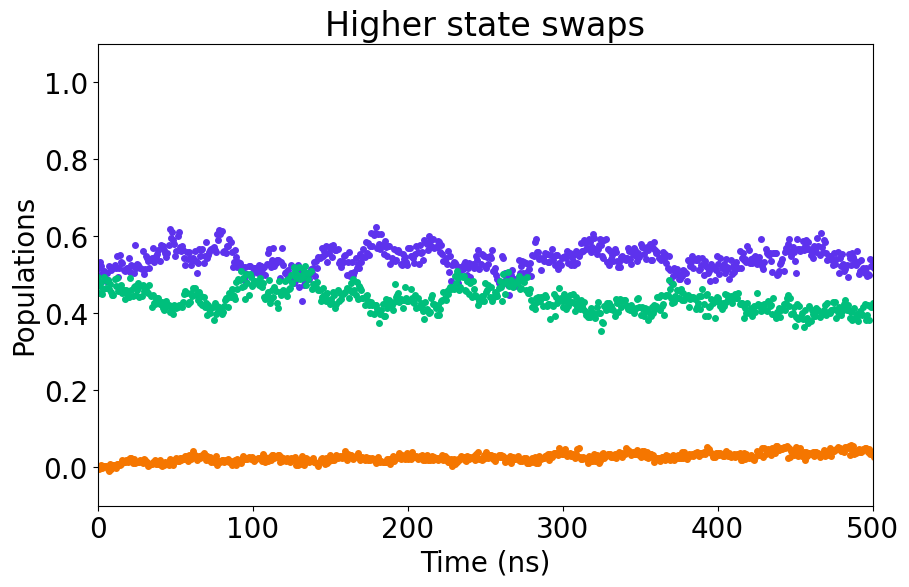

In [975]:
### minus negative data

title = 'Higher state swaps'

plot_traces(minus_negative_measurements_long, minus_negative_calibrated_parameters, calibrate_readout=True, 
            title=title, legend=False)